## SCIP example

This notebook demonstrates how to use `OptiWindNet` to design collector system cable layouts using the **MILPRouter with SCIP solver**.

In [1]:
from optiwindnet.api import WindFarmNetwork, EWRouter, MILPRouter, load_repository

In [2]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

### Initialize Sheringham Shoal

> Note: the `load_repository()` functionality of `OptiWindNet` is used to load a prebuilt *Networkx.Graph* of the avaible locations. For more details on this functionality look into the notebook about [Load repositories containing location data](a03_load_repositories.ipynb).

In [3]:
locations = load_repository()
L = locations.sheringham
capacity = 6

In [4]:

wfn = WindFarmNetwork(L=L, cables=capacity)

<Axes: >

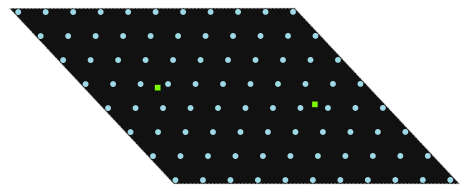

In [5]:
wfn.plot_location()

### Optimize Sheringham Shoal

Warmstart with `EWRouter`:

In [6]:
res_warmstart= wfn.optimize(router=EWRouter())
print(wfn.length())

64814.63197919911


In [7]:
milp_router = MILPRouter(solver_name='scip', time_limit=180, mip_gap=0.005, verbose=True)
res = wfn.optimize(router=milp_router)

Solver <scip> is not capable of warm-starting.


SCIP version 9.2.2 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: SoPlex 7.1.4] [GitHash: 416226a4f8]
Copyright (c) 2002-2025 Zuse Institute Berlin (ZIB)

External libraries: 
  SoPlex 7.1.4         Linear programming solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: 7c53d552]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (github.com/coin-or/CppAD)
  ZLIB 1.3.1           General purpose compression library by J. Gailly and M. Adler (zlib.net)
  GMP 6.3.0            GNU Multiple Precision Arithmetic Library developed by T. Granlund (gmplib.org)
  ZIMPL 3.6.2          Zuse Institute Mathematical Programming Language developed by T. Koch (zimpl.zib.de)
  AMPL/MP 690e9e7      AMPL .nl file reader library (github.com/ampl/mp)
  PaPILO 2.4.2         parallel presolve for integer and linear optimization (github.com/scipopt/papilo) (built with TBB) [GitHash: 4b399c4c]
  Nauty 2.8.8          Computing Graph Automor

In [8]:
wfn.G.SolutionInfo

SolutionInfo(runtime=<pyomo.opt.results.container.UndefinedData object at 0x00000230D01FCAA0>, bound=60471.0726450312, objective=62636.8123863739, relgap=0.03457614873476289, termination='maxTimeLimit')

In [9]:
wfn.length()

62686.049107126426

<Axes: >

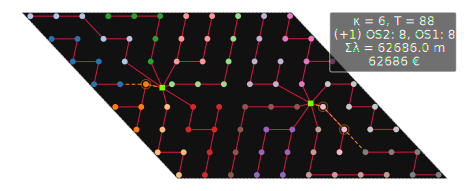

In [10]:
wfn.plot()